In [54]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import NormalDist
import pandas as pd
import datetime as dt

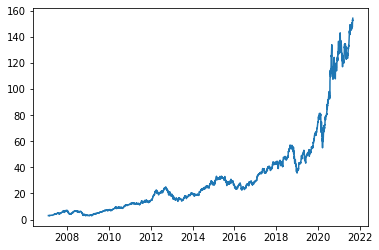

In [305]:
stocks = pd.read_csv('US_stocks_daily_prices.csv')
stocks['time'] = stocks.apply(lambda x: dt.datetime.fromisoformat(x['time']).date(), axis=1)
plt.plot(stocks['time'],stocks['AAPL'])

In [309]:
def get_mean_and_covariance(stocks, start_date, window):
    stocks_in_window = stocks[stocks['time']<start_date][-window-1:-1]
    stocks_in_window = stocks_in_window.drop(['time'], axis=1)
    stock_returns = stocks_in_window/stocks_in_window.shift(1)[1:]
    log_returns = np.log(stock_returns)
    sigma = log_returns.cov()
    mu = log_returns.mean()
    return mu, sigma



def get_shapre_ratio(alpha, sigma, mu):
    expected_return = np.sum(alpha * mu)
    expected_volatility = np.sqrt(alpha @ sigma @ alpha)
    return expected_return , expected_volatility

def get_markowitz_weights(A, sigma, mu):
    alpha = np.linalg.inv(sigma) @ mu 
    return alpha / alpha.sum()

(-0.1, 0.1)

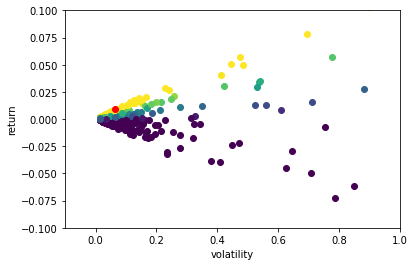

In [316]:
start_date = dt.date(2010, 2, 4)
stocks = stocks[['time','AAPL','ADSK','GRMN','ALGN','ETN']]
mu, sigma = get_mean_and_covariance(stocks, start_date, 50)
for i in range(1000):
    w = np.random.uniform(-1,1,5)
    w = w / w.sum()
    E, V = get_shapre_ratio(w, sigma, mu)
    plt.scatter(V,E, c=E/V, vmin=0, vmax=0.1)
alpha = get_markowitz_weights(10, sigma, mu)
E, V = get_shapre_ratio(alpha, sigma, mu)
plt.scatter(V,E, c='red')
plt.ylabel('return')
plt.xlabel('volatility')
plt.xlim((-0.1,1))
plt.ylim((-0.1,0.1))

In [312]:
alpha = get_markowitz_weights(1, sigma, mu)
E, V = get_shapre_ratio(alpha, sigma, mu)
E/V


0.14370166031913534

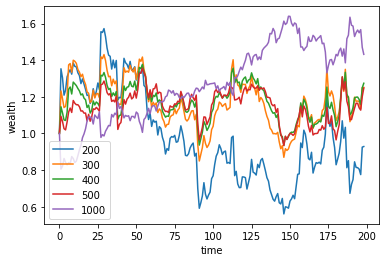

In [358]:
start_date = dt.date(2016, 2, 4)
stocks = pd.read_csv('US_stocks_daily_prices.csv')
stocks['time'] = stocks.apply(lambda x: dt.datetime.fromisoformat(x['time']).date(), axis=1)
stocks = stocks[['time','AAPL','ADSK','GRMN','ALGN','ETN']]
alphas = {}
sp = {}
for window in [200, 300, 400, 500, 1000]:
    mu, sigma = get_mean_and_covariance(stocks, start_date, window)
    alpha = get_markowitz_weights(10, sigma, mu)
    E,V = get_shapre_ratio(alpha, sigma, mu)
    sp[str(window)] = E/V
    alphas[str(window)] = alpha
returns = [[0],[0],[0],[0],[0]]
stocks = stocks[stocks['time']>start_date].drop(['time'], axis=1)
for index, row in stocks.iterrows():
    for ind,(k,alpha) in enumerate(alphas.items()):
        returns[ind].append(alpha @ row)
plt.plot(returns[0][1:200]/returns[0][1],label='200')
plt.plot(returns[1][1:200]/returns[1][1], label='300')
plt.plot(returns[2][1:200]/returns[2][1],label='400')
plt.plot(returns[3][1:200]/returns[3][1],label='500')
plt.plot(returns[4][1:200]/returns[4][1],label='1000')
plt.xlabel('time')
plt.ylabel('wealth')
plt.legend()

In [357]:
sp

{'200': -0.1495090632412928,
 '300': -0.10933705786953721,
 '400': -0.11176069176749984,
 '500': -0.08670082565371873,
 '1000': 0.05585216513532582}